In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('seaborn-dark')

In [162]:
matches=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\matches.csv',parse_dates=['date'])
deliveries=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\deliveries.csv')
matches.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)
deliveries.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)

deliveries.wide_runs.replace(0,np.nan,inplace=True)

In [163]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Q1

In [164]:
kxip_srh=matches[((matches.team1=='Kings XI Punjab') | (matches.team2=='Kings XI Punjab')) & ((matches.team1=='Sunrisers Hyderabad') | (matches.team2=='Sunrisers Hyderabad'))].copy()
kxip=matches[(matches.team1=='Kings XI Punjab') | (matches.team2=='Kings XI Punjab')].copy()
srh=matches[(matches.team1=='Sunrisers Hyderabad') | (matches.team2=='Sunrisers Hyderabad')].copy()
kxip_srh.shape,kxip.shape,srh.shape

((24, 18), (176, 18), (183, 18))

In [165]:
kxip_srhdeli=deliveries[((deliveries.batting_team=='Kings XI Punjab') | (deliveries.bowling_team=='Kings XI Punjab')) & ((deliveries.batting_team=='Sunrisers Hyderabad') | (deliveries.bowling_team=='Sunrisers Hyderabad'))].copy()
kxipdeli=deliveries[(deliveries.batting_team=='Kings XI Punjab') | (deliveries.bowling_team=='Kings XI Punjab')].copy()
srhdeli=deliveries[(deliveries.batting_team=='Sunrisers Hyderabad') | (deliveries.bowling_team=='Sunrisers Hyderabad')].copy()
kxip_srhdeli.shape,kxipdeli.shape,srhdeli.shape

((5854, 21), (41713, 21), (43760, 21))

In [166]:
kxip_srh.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
18,19,2017,Hyderabad,2017-04-17,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,5,0,B Kumar,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,A Deshmukh,NaN
31,32,2017,Chandigarh,2017-04-28,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,26,0,Rashid Khan,"Punjab Cricket Association IS Bindra Stadium, ...",Nitin Menon,CK Nandan,NaN
76,77,2008,Hyderabad,2008-05-01,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,SE Marsh,"Rajiv Gandhi International Stadium, Uppal",BR Doctrove,RB Tiffin,NaN
107,108,2008,Chandigarh,2008-05-23,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,SE Marsh,"Punjab Cricket Association Stadium, Mohali",Asad Rauf,SJ Davis,NaN
150,151,2009,Kimberley,2009-05-09,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,3,DPMD Jayawardene,De Beers Diamond Oval,GAV Baxter,AM Saheba,NaN


In [167]:
kxip.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
10,11,2017,Kolkata,2017-04-13,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
18,19,2017,Hyderabad,2017-04-17,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,5,0,B Kumar,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,A Deshmukh,NaN


In [168]:
srh.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
18,19,2017,Hyderabad,2017-04-17,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,5,0,B Kumar,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,A Deshmukh,NaN


In [169]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(nrows=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],color='Darkslategray')
        ax[i].set_title(columns[i])

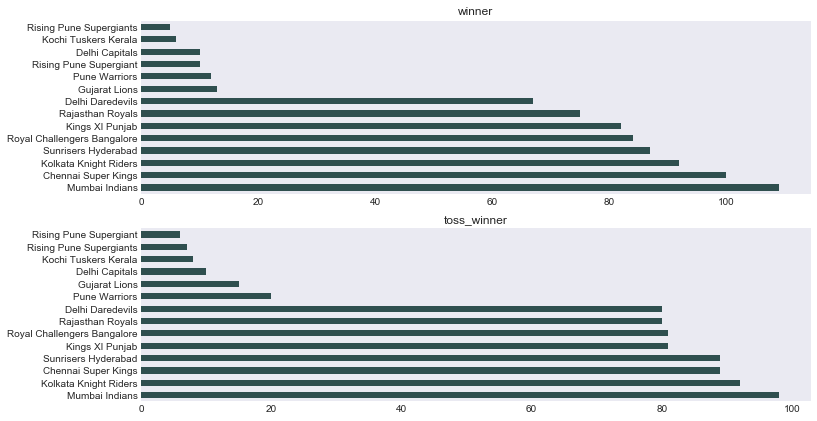

In [170]:
cat_plot(matches,['winner','toss_winner'],(12,7),'barh')

In [171]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(ncols=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],colors=['slategray','Aqua'],autopct='%2.f%%')
        ax[i].set_title(columns[i])

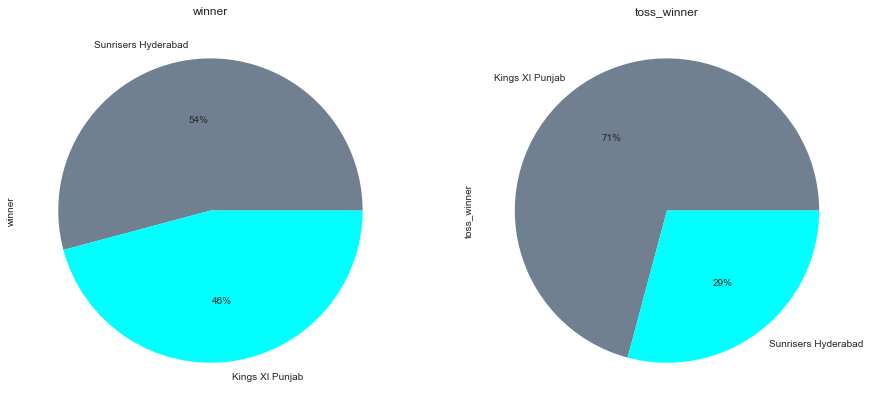

In [172]:
cat_plot(kxip_srh,['winner','toss_winner'],(15,8),'pie')

### As we can see that there is no proper correlation between the winner and toss winner so we can't say for sure who will win and would have to guess according to domain knowledge.

# Q2
+ Out or Not out

In [173]:
warner_status=srhdeli[(srhdeli.batsman=='DA Warner') & (srhdeli.batting_team=='Sunrisers Hyderabad')].pivot_table(index='match_id',
                                                                                                  values='player_dismissed',
                                                                                                  aggfunc='count')


In [174]:
warner_status_kxip=kxip_srhdeli[(kxip_srhdeli.batsman=='DA Warner') & (kxip_srhdeli.batting_team=='Sunrisers Hyderabad')].pivot_table(index='match_id',
                                                                                                                           values='player_dismissed',
                                                                                                                           aggfunc='count')


In [175]:
warner_status.describe().iloc[0:3]


,player_dismissed
count,71.000000
mean,0.887324
std,0.432577


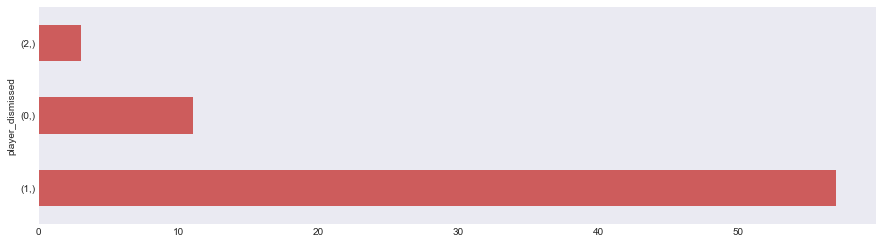

In [176]:
warner_status.value_counts().plot.barh(color='indianred',figsize=(15,4))


In [177]:
warner_status_kxip.describe().iloc[0:3]

,player_dismissed
count,10.000000
mean,1.000000
std,0.471405


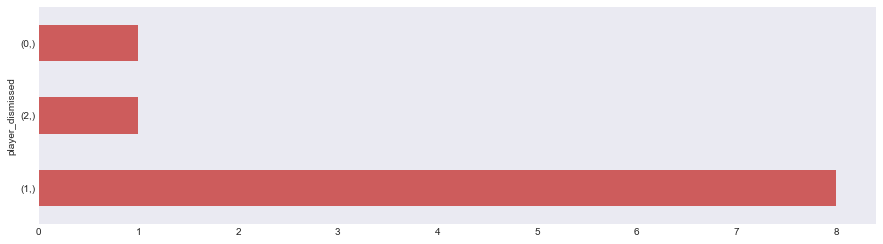

In [178]:
warner_status_kxip.value_counts().plot.barh(color='indianred',figsize=(15,4))


### It's clearly visible that warner will get out in the match as per previous records.

# Q2
- Strike rate

In [179]:
warner_strike=deliveries[deliveries.batsman=='DA Warner'].pivot_table(index='match_id',aggfunc=['count','sum'],values=['ball','batsman_runs'])
warner_strike.head()

count               sum             
          ball batsman_runs ball batsman_runs
match_id                                     
1            9            9   29           14
6           47           47  162           76
10          34           34  116           49
14          31           31  112           26
19          57           57  208           70

In [180]:
(warner_strike['sum','batsman_runs']/warner_strike['count','ball']*100).describe()


count    126.000000
mean     120.454240
std       53.993947
min        0.000000
25%       89.523810
50%      124.404762
75%      157.506053
max      223.076923
dtype: float64

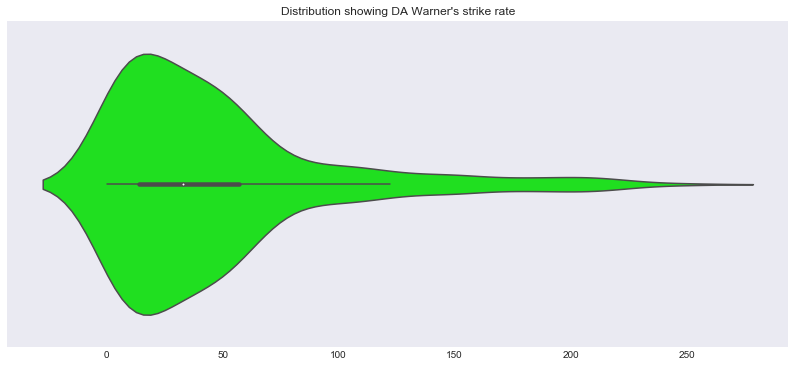

In [181]:
plt.figure(figsize=(14,6))
sns.violinplot(warner_strike,color='Lime')
plt.title('Distribution showing DA Warner\'s strike rate')
plt.show()

### This leads us to the decision that David Warner's strike rate distribution lies around mostly within 100-150 as the mean is around 120 with a std of 53 so, we can assume that he will have a strike rate of more than 120

# Q3

In [200]:
rahul=kxipdeli[kxipdeli.batsman.str.contains('KL Rahul')].groupby('match_id').batsman_runs.sum()
rahul.describe()

count     33.000000
mean      42.363636
std       31.175730
min        1.000000
25%       17.000000
50%       37.000000
75%       68.000000
max      104.000000
Name: batsman_runs, dtype: float64

In [185]:
kxip_runs=kxipdeli[kxipdeli.batting_team=='Kings XI Punjab'].groupby('match_id').total_runs.sum()

kxip_runs.describe()

count    176.000000
mean     158.482955
std       32.398761
min       68.000000
25%      135.750000
50%      163.000000
75%      181.000000
max      232.000000
Name: total_runs, dtype: float64

In [190]:
srhkxip_runs=kxip_srhdeli[kxip_srhdeli.batting_team=='Kings XI Punjab'].groupby('match_id').total_runs.sum()

srhkxip_runs.describe()

count     24.000000
mean     162.250000
std       27.184155
min      116.000000
25%      140.750000
50%      168.000000
75%      179.250000
max      211.000000
Name: total_runs, dtype: float64

Text(0.5, 1.0, 'Score Distribution')

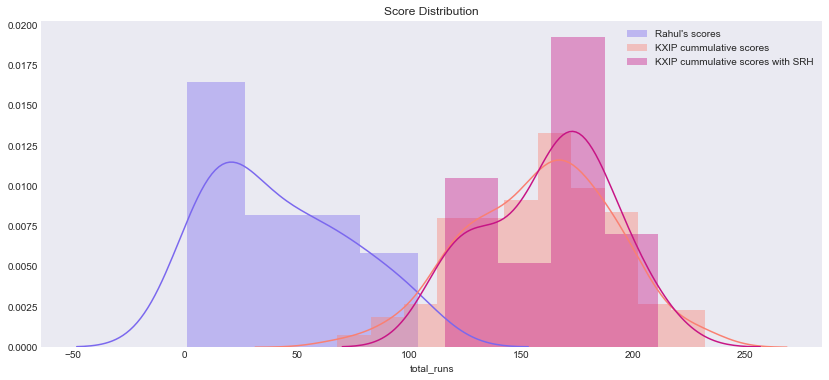

In [203]:
plt.figure(figsize=(14,6))
sns.distplot(rahul,color='MediumSlateBlue')
sns.distplot(kxip_runs,color='Salmon')
sns.distplot(srhkxip_runs,color='MediumVioletRed')
plt.legend(['Rahul\'s scores',
            'KXIP cummulative scores',
            'KXIP cummulative scores with SRH'])
plt.title('Score Distribution')

In [197]:
round((rahul.mean()/kxip_runs.mean())*100,3),round((rahul.mean()/srhkxip_runs.mean())*100,3)

(26.731, 26.11)

In [211]:
((rahul/srhkxip_runs)*100).value_counts()

8.955224     1
9.444444     1
13.989637    1
46.710526    1
48.275862    1
26.446281    1
dtype: int64

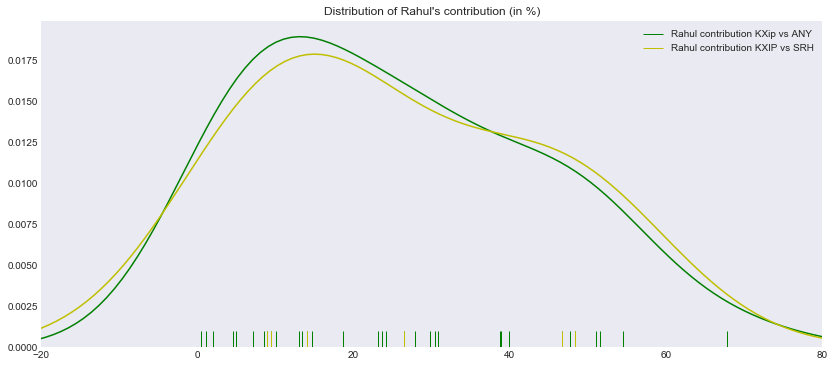

In [216]:
plt.figure(figsize=(14,6))
sns.distplot((rahul/kxip_runs)*100,hist=False,rug=True,color='g')
sns.distplot((rahul/srhkxip_runs)*100,hist=False,rug=True,color='y')
plt.title('Distribution of Rahul\'s contribution (in %)')
plt.legend(['Rahul contribution KXip vs ANY','Rahul contribution KXIP vs SRH'])
plt.xlim([-20,80])
plt.show()

### From the above analysis we can conclude that Rahul will contribute around 15-22% towards KXIP's total score

# Q4

In [323]:
srh_scores=srhdeli.query('batting_team=="Sunrisers Hyderabad" & over<=8').pivot_table(index=['match_id',],aggfunc=['sum','count'],values=['total_runs','ball'])
srh_scores=srh_scores[(srh_scores['sum','total_runs']==50)]

sum            count           
         ball total_runs  ball total_runs
match_id                                 
316       168         50    48         48
331       168         50    48         48
384       182         50    50         50
432       168         50    48         48
461       189         50    51         51
7932      182         50    50         50

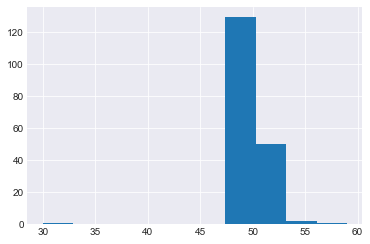

In [324]:
srh_scores['count','ball'].hist()

### From the above observation we can assume that SRH will use up a little less than 50 balls to score 50 runs

# Q5

In [277]:
gayle_overall=deliveries[(deliveries.batsman.str.contains('CH Gayle')) & (deliveries.over<=2)].groupby(['match_id',
                                                                                 'batsman']).sum()
gayle_overall.batsman_runs

match_id  batsman 
1         CH Gayle     2
5         CH Gayle     5
12        CH Gayle     2
20        CH Gayle     2
27        CH Gayle     0
                      ..
11328     CH Gayle     1
11333     CH Gayle    13
11339     CH Gayle     4
11343     CH Gayle    11
11346     CH Gayle     5
Name: batsman_runs, Length: 122, dtype: int64

In [278]:
gayle_overall.batsman_runs.describe()

count    122.000000
mean       5.942623
std        6.588619
min        0.000000
25%        1.000000
50%        4.000000
75%        8.000000
max       35.000000
Name: batsman_runs, dtype: float64

Text(0.5, 1.0, 'Gayle runs distribution')

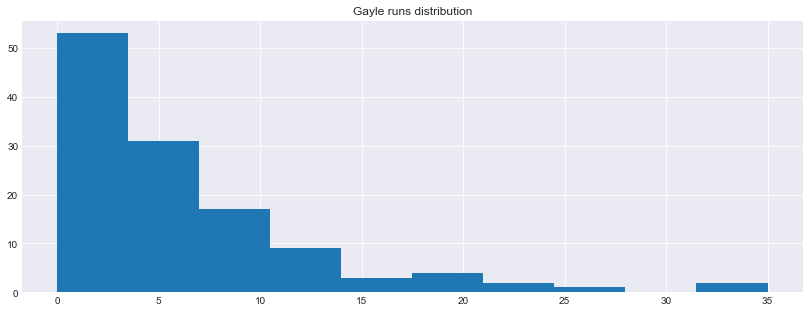

In [279]:
gayle_overall.batsman_runs.hist(figsize=(14,5))
plt.title('Gayle runs distribution')

In [280]:
gayle_headon=kxip_srhdeli[(kxip_srhdeli.batsman.str.contains('CH Gayle')) & (kxip_srhdeli.over<=2)].groupby(['match_id',
                                                                                                             'batsman']).sum()
gayle_headon.batsman_runs

match_id  batsman 
7909      CH Gayle    7
7918      CH Gayle    8
11313     CH Gayle    7
11339     CH Gayle    4
Name: batsman_runs, dtype: int64

In [281]:
gayle_headon.batsman_runs.describe()

count    4.000000
mean     6.500000
std      1.732051
min      4.000000
25%      6.250000
50%      7.000000
75%      7.250000
max      8.000000
Name: batsman_runs, dtype: float64

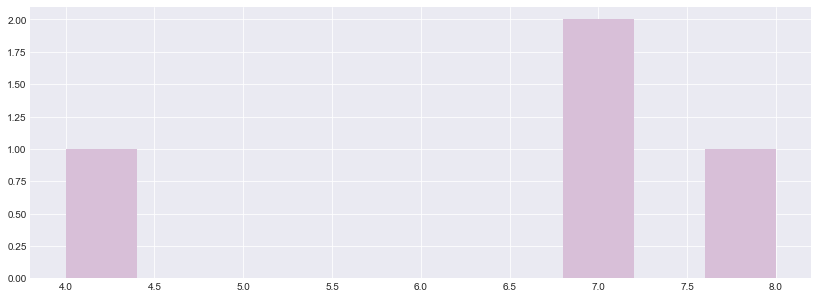

In [274]:
gayle_headon.batsman_runs.hist(figsize=(14,5),color='Thistle')

### As we can see above ,Gayles will most likely score less than 10 in the first 10 balls he encounters.